<h1><center><center><h1><h1><center><span style="color:#2189b5">Linear Regression with Multiple Variables</span><center><h1>

## In this notebook, we will implement linear regression with multiple variables to predict the prices of houses, using scikit-learn.

### Introduction :
Suppose you are selling your house and want to know what would be a good price to list it at. You have a dataset of houses with features such as the size of the house, the number of bedrooms, and the age of the house, along with their corresponding prices.

You would like to use this data to build a linear regression model that can predict the price of a house based on its features.

### This notebook contains :
The dataset for our linear regression problem. The first column is the size of the house in square feet, the second column is the number of bedrooms, and the third column is the House Age, forth column is the Price of the house.

### Task : 
Build a linear regression model to predict the price of a house based on its size and number of bedrooms, using scikit-learn.

1.Perform exploratory data analysis (EDA) to understand the dataset.<br>
2.Implement feature scaling to normalize the features.<br>
3.Use scikit-learn's LinearRegression model to fit the data and learn the parameters.<br>
4.Use the trained model to predict the price of a house with 1650 square feet and 3 bedrooms.

### Bonus Task : 
1.Implement gradient descent or normal equation to solve for the optimal parameters without using scikit-learn.<br>
2.Compare the results of the scikit-learn model with the results from the custom implementation.

# Libraries you will need :


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The Dataset :
### Just run this code for the datasets...

In [2]:
house_sizes = [1500, 2000, 1600, 1200, 1800, 2200, 1300, 1900, 2100, 1700, 1400, 2000, 1100, 1300, 1500, 1700, 1900, 2100, 2300, 2500]
bedrooms = [3, 4, 3, 2, 3, 4, 2, 4, 4, 3, 2, 4, 2, 2, 3, 3, 4, 4, 4, 5]
ages = [10, 5, 8, 15, 3, 2, 12, 6, 4, 9, 13, 7, 14, 11, 10, 8, 5, 2, 1, 6]
prices = [250000, 350000, 275000, 200000, 320000, 400000, 220000, 380000, 390000, 300000, 240000, 350000, 190000, 230000, 260000, 280000, 360000, 400000, 420000, 450000]

df = pd.DataFrame({'Size': house_sizes, 'Bedrooms': bedrooms, 'House Age': ages, 'Price': prices})
df

,Size,Bedrooms,House Age,Price
0,1500,3,10,250000
1,2000,4,5,350000
2,1600,3,8,275000
3,1200,2,15,200000
4,1800,3,3,320000
5,2200,4,2,400000
6,1300,2,12,220000
7,1900,4,6,380000
8,2100,4,4,390000
9,1700,3,9,300000


<h1><font color='#2189b5'> Perform exploratory data analysis (EDA) to understand the dataset.</font></h1>
<br><br>

#### 1 - First understand how does each feature in the dataset effects the `price` of the house :

In [3]:
df.describe()

,Size,Bedrooms,House Age,Price
count,20.000000,20.000000,20.000000,20.000000
mean,1755.000000,3.250000,7.550000,313250.000000
std,389.973009,0.910465,4.160908,79144.687623
min,1100.000000,2.000000,1.000000,190000.000000
25%,1475.000000,2.750000,4.750000,247500.000000
50%,1750.000000,3.000000,7.500000,310000.000000
75%,2025.000000,4.000000,10.250000,382500.000000
max,2500.000000,5.000000,15.000000,450000.000000


In [4]:
df.dtypes

Size         int64
Bedrooms     int64
House Age    int64
Price        int64
dtype: object

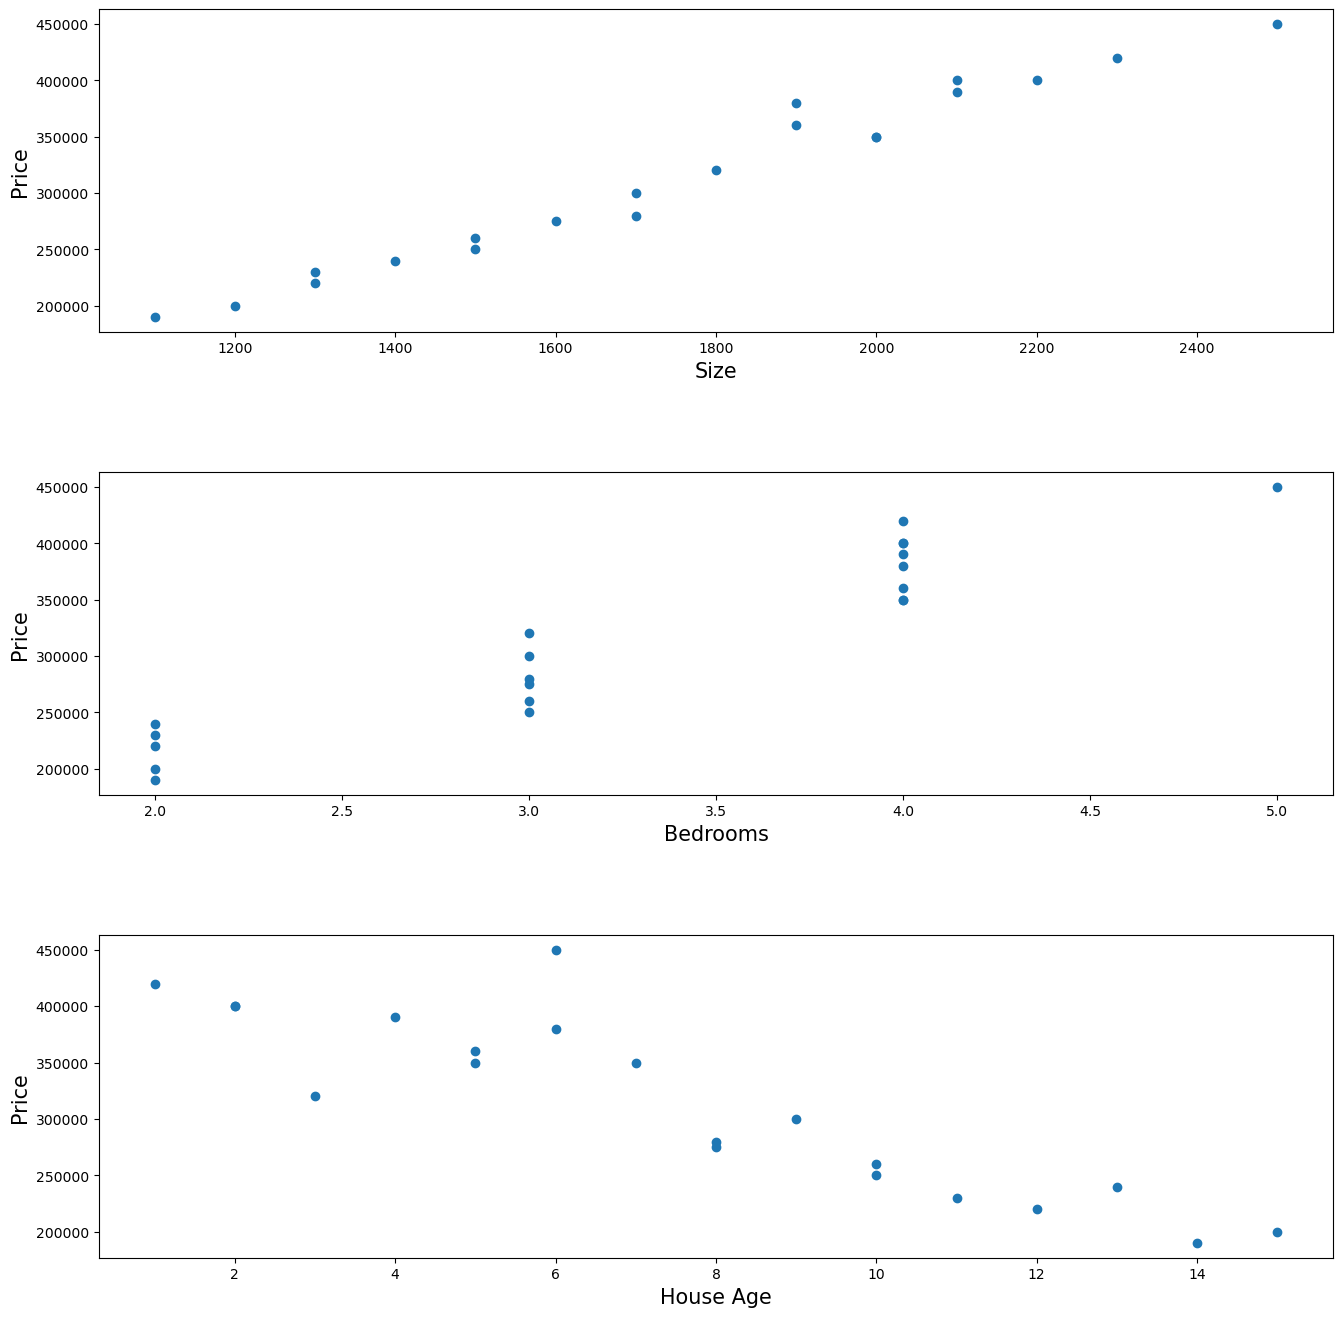

In [5]:
## 1 - Write your code here :

fig, ax = plt.subplots(3,1, figsize=(15,15))
fig.tight_layout(pad=8)
for i in range(3):
    ax[i].scatter(df.iloc[:,i],df["Price"])
    ax[i].set_xlabel(df.columns[i], fontsize=15)
    ax[i].set_ylabel(ylabel="Price", fontsize=15)    
plt.show()



<details>
    <summary><Font color='blue'>Click for a hint</Font></summary>
    <br><br>
    Use Scatter Plots ;)
</details>

<br><br>

#### 2 - Second Visualize the distribution of each of the continous features of the data :

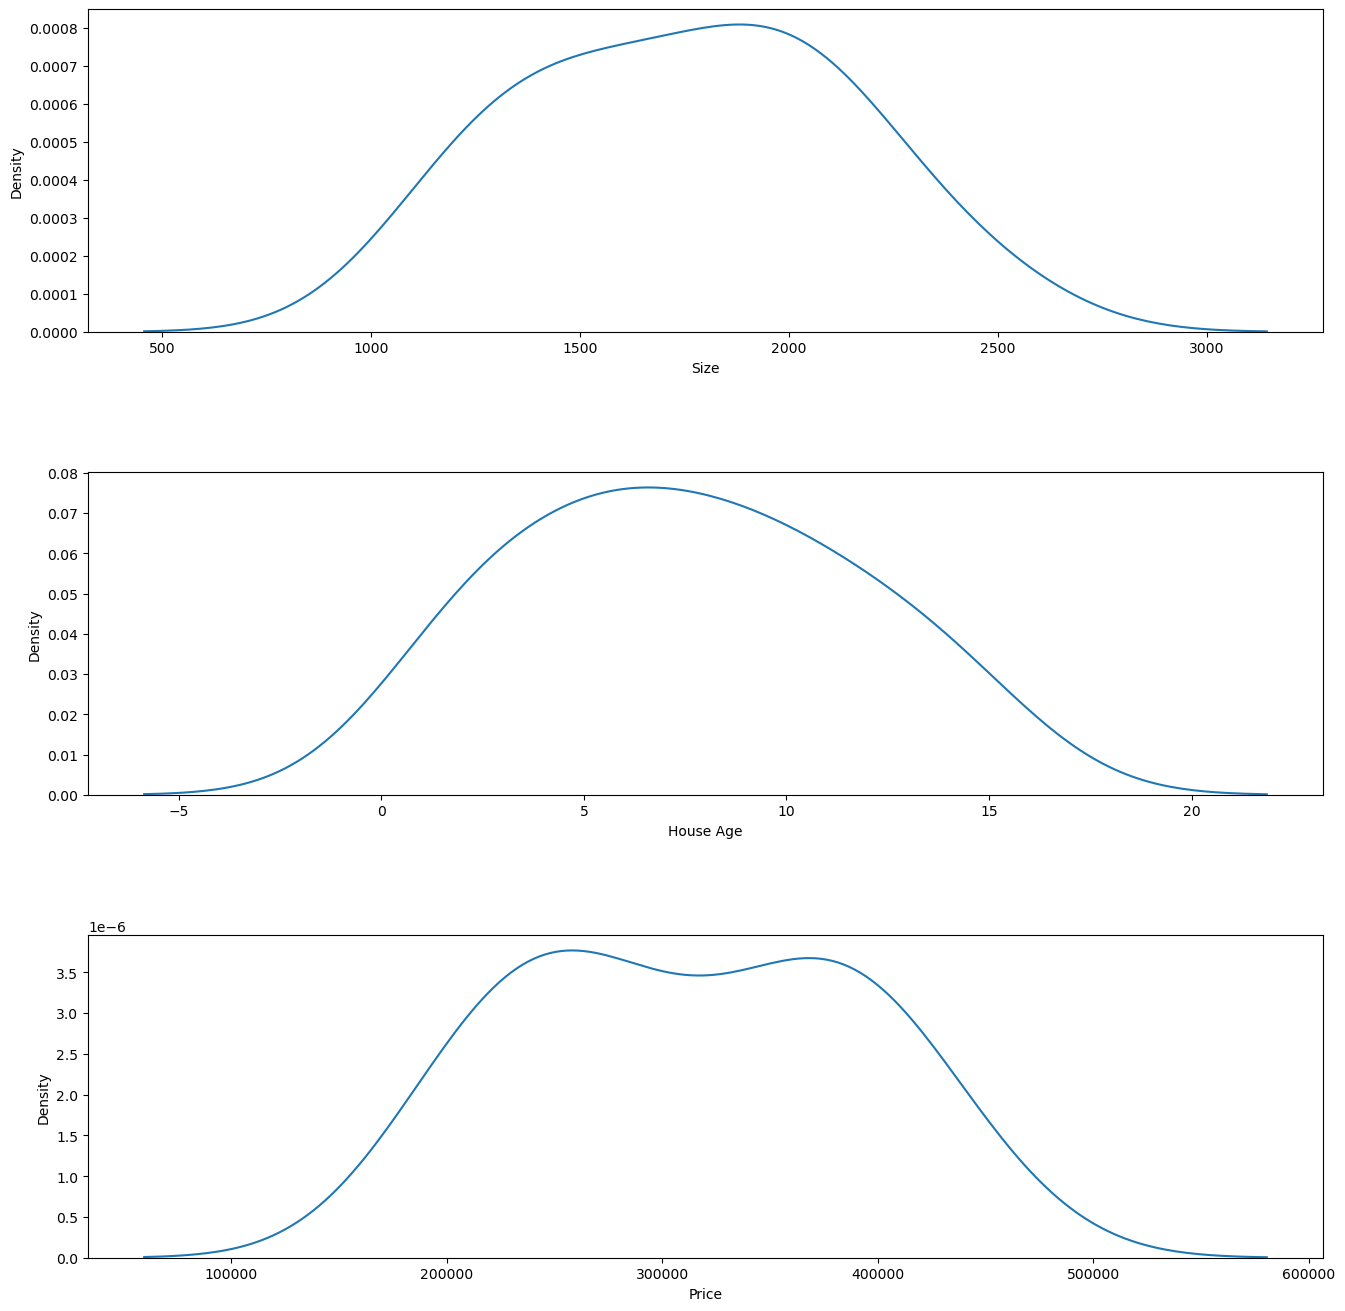

In [6]:
fig, ax = plt.subplots(3,1, figsize=(15,15))
fig.tight_layout(pad=8)

sns.kdeplot(df.iloc[:,0], ax=ax[0])
sns.kdeplot(df.iloc[:,2], ax=ax[1])
sns.kdeplot(df.iloc[:,3], ax=ax[2])
   
plt.show()


<details>
    <summary><Font color='blue'>Click for a hint</Font></summary>
    <br><br>
    Use KDE Plots ;)
</details>

<br><br>

<h1><font color='#2189b5'>Briefly describe the insights you got after visualizing the data :</font></h1>
<br><br>

In [7]:
## 3 - Write what you noticed here :

"""
All of them ar normally distributed

"""

'\nAll of them ar normally distributed\n\n'

<h1><font color='#2189b5'>Look again at the dataframe then...</font></h1><br>
- Store the target variable (price) in a variable y.<br>
- Store the features in variable x.


In [8]:
# 4 - Write your code here :
x = df.iloc[:, :3]
y = df.loc[:, "Price"]

<h1><font color='#2189b5'>Now for data preprocessing... implement feature scaling to normalize the features. </font></h1>
<br><br>

#### there is many scaling methods found in sklearn.preprocessing 
https://scikit-learn.org/stable/modules/preprocessing.html

#### Use Scaling to scale the features (Note you only scale x) :

In [9]:
## 5 - write your code here :
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

<h1><font color='#2189b5'>Based on the previous data let's build our Machine Learning model...</font></h1>
<br><br>

#### import linear regression from sklearn

In [10]:
# 6 - Write your code here :
from sklearn.linear_model import LinearRegression

<details>
    <summary><Font color='blue'>Click for a hint</Font></summary>
    <br><br>
    from sklearn.linear_model import LinearRegression
</details>

<br><br>

#### Ok remember that we imported LinearRegression from sklearn, now We want to create object from this class....<br><br>Make object from LinearRegression class and name it as `lr`

In [11]:
# 7 - Write your code here :
lr = LinearRegression()


#### Fit your linear regression model on the training data that you have, which is x and y...

In [12]:
# 8 - Write your code here :
lr.fit(x_scaled,y)

LinearRegression()

#### Let's have a look on the parameters of the model that you trained :)

In [13]:
# 9 - Write your code here :
print(f"Coefficients W = {lr.coef_}")
print(f"Interception b = {lr.intercept_}")

Coefficients W = [54094.71792005 13900.03364068 -9847.81236582]
Interception b = 313250.0


<details>
    <summary><Font color='blue'>Click for a hint</Font></summary>
    <br><br>
    to get weights use : lr.coef_ <br><br>
    to get bias use : lr.intercept_
</details>

<br><br>


<h1><font color='#2189b5'>Now your model is trained and it is now ready for making new predictions</font></h1>
<h3><font color='blue'>Note that to make new predictions you should make same scaling and preprocessing on the new test data also...</font></h3>
<br><br>

#### Use the trained model to predict the price of a house with `1650 square feet`, `3 bedrooms` and `7 years age`.

In [25]:
# 10 - Write your code here :
test_1 = np.array([[1650,3,7]])
test_1 = scaler.transform(test_1)
test_1

C:\Users\Yousef\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.27624406, -0.28171808, -0.13561657]])

In [43]:
sklearn_prediction = lr.predict(test_1)
sklearn_prediction

array([295726.29115828])

<br><br>
<h1><font color='BLUE'>BONUS Questions : </font></h1>

#### Implement gradient descent or normal equation to solve for the optimal parameters without using scikit-learn.

In [27]:
def compute_cost(x, y, w, b):
    
    m = x.shape[0] #number of examples
    j_wb = 0
    
    for i in range(m):
        f_wb = np.dot(w,x[i]) + b
        cost = (f_wb - y[i])**2
        j_wb += cost
    j_wb /=(2*m)
    
    return j_wb

In [28]:
## Write your code here : 
def compute_gradient_LR(x, y, w, b, alpha, iterations):
    
    '''
    m = number of examples "rows"
    n = number of features "columns"
    
    '''
    
    m,n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    
    for iteration in range(iterations):
        for j in range(n):
            for i in range(m):
                f_wb = np.dot(w,x[i]) + b
                err = f_wb - y[i]
                dj_dw[j] += (err * x[i,j])
                dj_db += err
        dj_dw /= m
        dj_db /= (m*n)
        w -= (alpha*dj_dw)
        b -= (alpha*dj_db)
        
        if (iteration % 1000) == 0:
            print(f"cost at iteration {iteration}= {compute_cost(x, y, w, b)}")
            
    return w, b

In [29]:
w_final, b_final = compute_gradient_LR(x_scaled, y, np.zeros(3), 0, 0.1, 10000)

cost at iteration 0= 41343929512.56383
cost at iteration 1000= 69204218.52356437
cost at iteration 2000= 69196823.08106294
cost at iteration 3000= 69196820.15826735
cost at iteration 4000= 69196820.15711227
cost at iteration 5000= 69196820.15711175
cost at iteration 6000= 69196820.1571118
cost at iteration 7000= 69196820.15711185
cost at iteration 8000= 69196820.1571118
cost at iteration 9000= 69196820.1571118


In [30]:
print(f"value of b_interecept from sklearn is {lr.intercept_} and from our implementaion is {b_final}")
print(f"value of W from sklearn library is {lr.coef_} and from our implementaion is {w_final}")

value of b_interecept from sklearn is 313250.0 and from our implementaion is 313249.99999999977
value of W from sklearn library is [54094.71792005 13900.03364068 -9847.81236582] and from our implementaion is [54094.71792005 13900.03364068 -9847.81236582]


In [45]:
custom_implementation_prediction = np.dot(w_final,test_1.flatten()) + b_final
custom_implementation_prediction

295726.2911582816

#### Compare the results of the scikit-learn model with the results from the custom implementation.

In [51]:
sklearn_prediction[0]

295726.2911582818

In [49]:
custom_implementation_prediction

295726.2911582816